### Importing Libraries

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

### Loading Data

In [56]:
data = pd.read_csv('data_for_lr.csv')

In [57]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [59]:
data.isnull().sum()

x    0
y    1
dtype: int64

### Data Pre-Processing

In [60]:
data = data.dropna()
print("Shape of data:",data.shape)

Shape of data: (699, 2)


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitting Data

In [62]:
# training input and output data
# Reshaping to maintain structure
train_input  = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# validation data input and output
test_input   = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

In [63]:
print(f'Training input data shape = {train_input.shape}')
print(f'Training output data shape = {train_output.shape}')
print(f'Testing input data shape = {test_input.shape}')
print(f'Testing output data shape = {test_output.shape}')

Training input data shape = (500, 1)
Training output data shape = (500, 1)
Testing input data shape = (199, 1)
Testing output data shape = (199, 1)


### <font color= 'white'>Linear Regression</font>

### <font color= 'pink'>Forward Propogation</font>
f(x) = mx + c

In [64]:
def forward_propogation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m,train_input) + c
    
    return predictions

### <font color= 'pink'>Cost Function</font>

![Cost Function](CostFunction.png)

In [76]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions )** 2) * 0.5
    return cost

### <font color= 'white'>Gradient Descent for Back Propogation</font>
![Gradient Descent using chain Rule](ChainRule.png)
### <font color= 'white'>Derivatives</font>
![Gradient Descent using chain Rule](Derivative.png)
![Gradient Descent using chain Rule](GradientDescent.png)

In [77]:
def backward_propogation(train_input,train_output,predictions):
    derivatives = dict()
    # predictions, train_output is an array
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"]  = dm
    derivatives["dc"]  = dc
    
    return derivatives

### <font color= 'white'>Update Parameters</font>
![UpdateParameters](Parameters.png)

In [78]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

### <font color= 'white'>Model Training</font>

In [79]:
# Train the model upto the point when we can't further reduce cost function
def train(train_input,train_output,learning_rate,iters):
    # random parameters
    parameters       = dict()
    parameters["m"]  = np.random.uniform(0,1) * -1
    parameters["c"]  = np.random.uniform(0,1) * -1
    
    # Prevent the overlap of iteration 1 over iteration 2 and so on..
    plt.figure()
    # Loss (Helps to visualise how the cost function is reducing every time)
    loss = list()
    # iteration
    for i in range(iters):
        # Step1: forward propogation
        predictions = forward_propogation(train_input,parameters)
        # Step2: cost
        cost = cost_function(predictions,train_output)
        
        loss.append(cost)
        print(f"iteration = {i+1}, loss = {cost}")
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input,train_output,"+",label = "Original")
        # Models Hypothesis
        ax.plot(train_input,predictions,"*",label = "Training")
        legend = ax.legend()
        
        plt.plot(train_input,train_output,"+",label = "Original")
        plt.plot(train_input,predictions,"*",label = "Training")
        plt.show()
        
        #Step3 : Back Propogation
        derivatives = backward_propogation(train_input,train_output,predictions)
        # update the parameters
        parameters  = update_parameters(parameters,derivatives,learning_rate)
    return parameters, loss

### Training

iteration = 1, loss = 5209.3074805036


<Figure size 640x480 with 0 Axes>

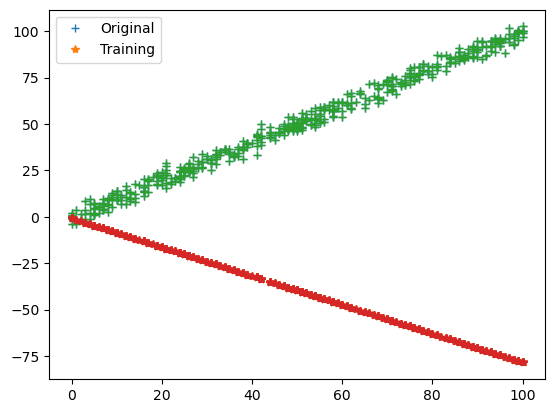

iteration = 2, loss = 2365.6261314409253


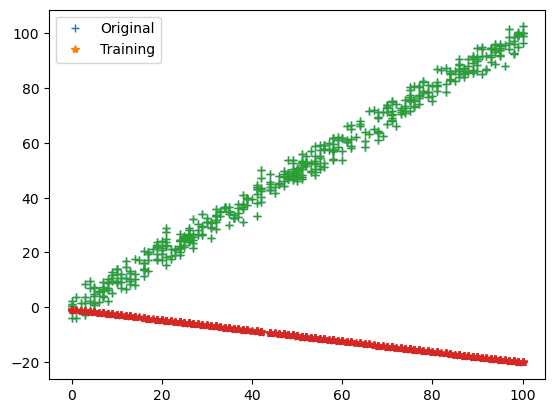

iteration = 3, loss = 1075.4447525179653


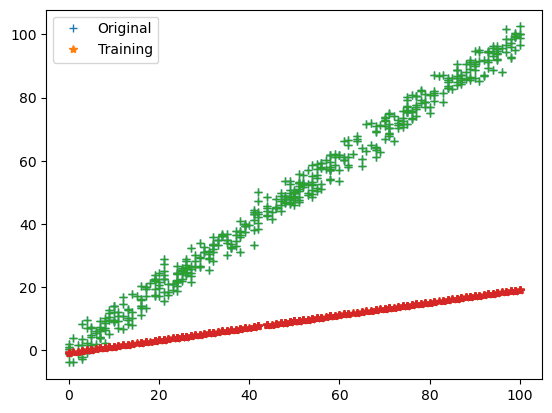

iteration = 4, loss = 490.0880307680404


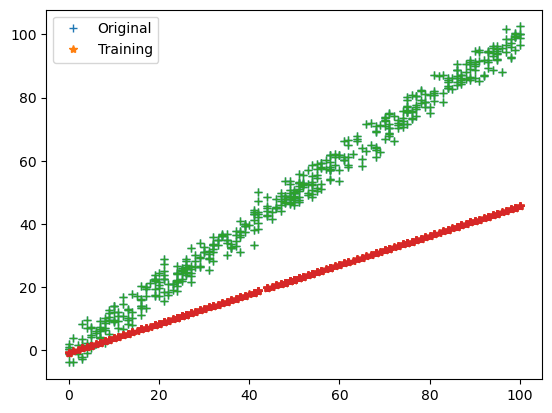

iteration = 5, loss = 224.51103667041485


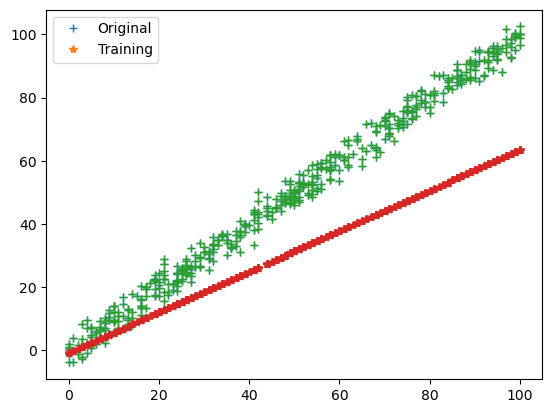

iteration = 6, loss = 104.01845920989723


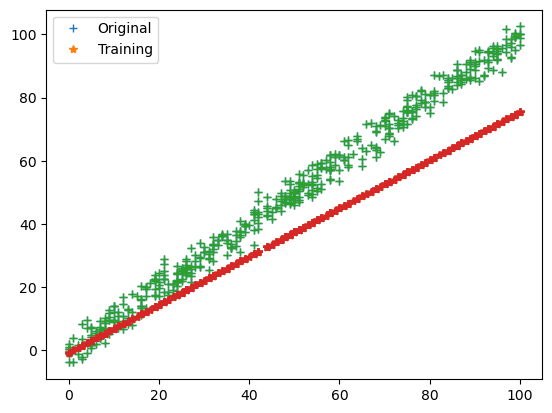

iteration = 7, loss = 49.35084227916905


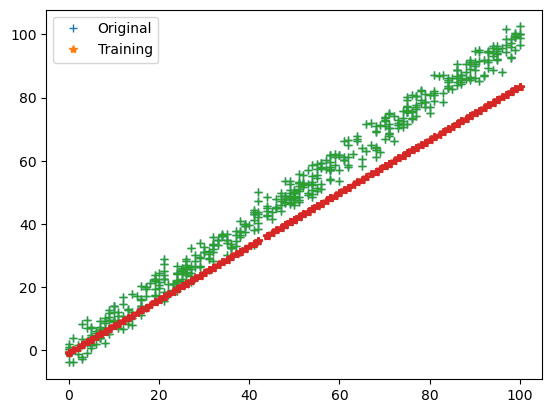

iteration = 8, loss = 24.548082851299675


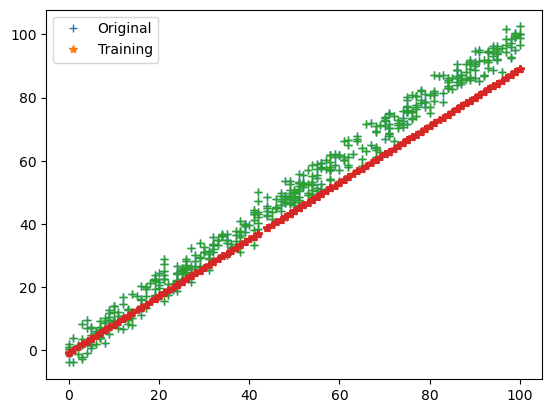

iteration = 9, loss = 13.295042352078513


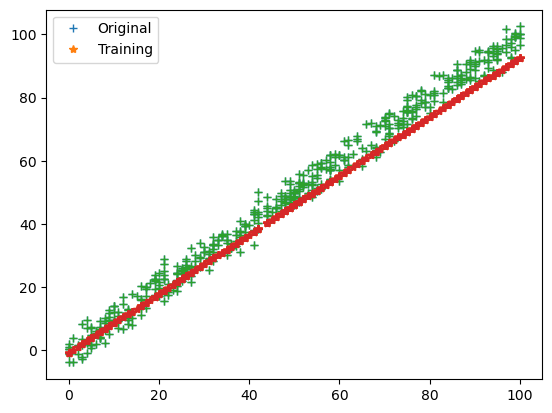

iteration = 10, loss = 8.189524339066246


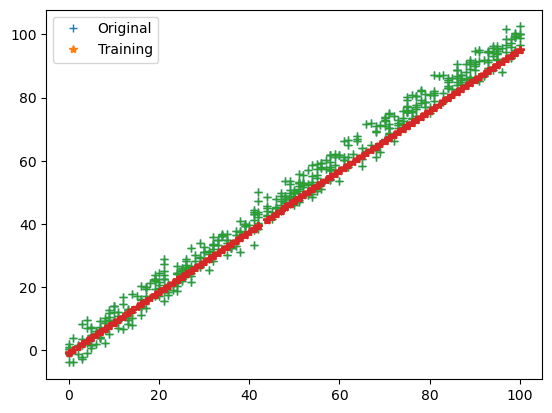

iteration = 11, loss = 5.873144087350351


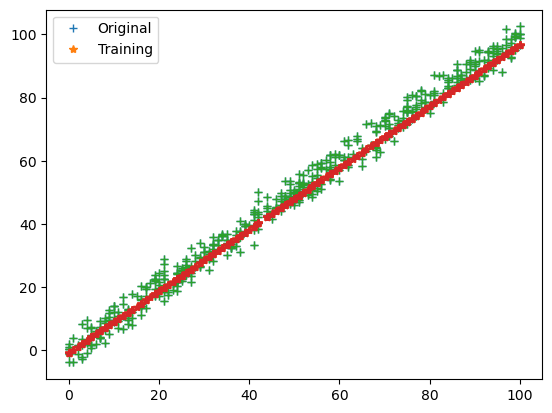

iteration = 12, loss = 4.822198727352663


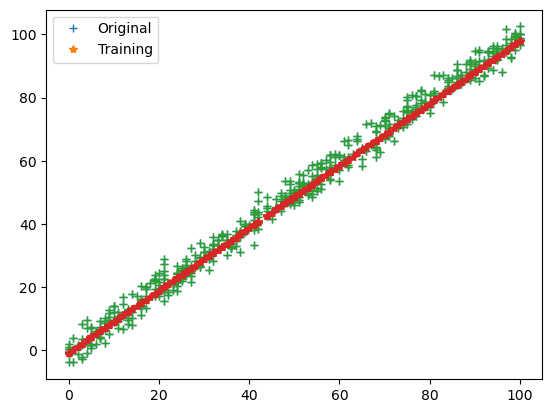

iteration = 13, loss = 4.34538257942947


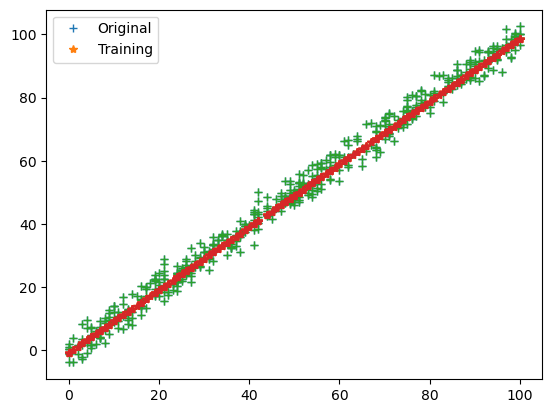

iteration = 14, loss = 4.129049491007752


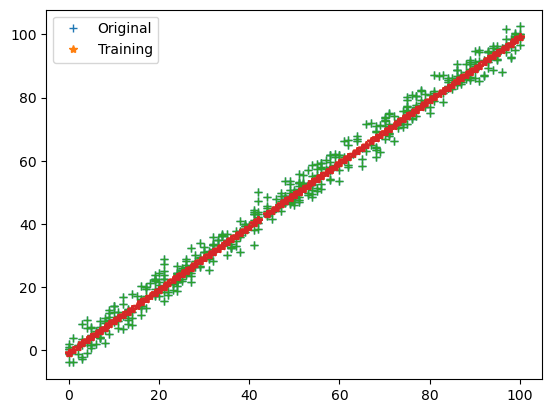

iteration = 15, loss = 4.030897855257728


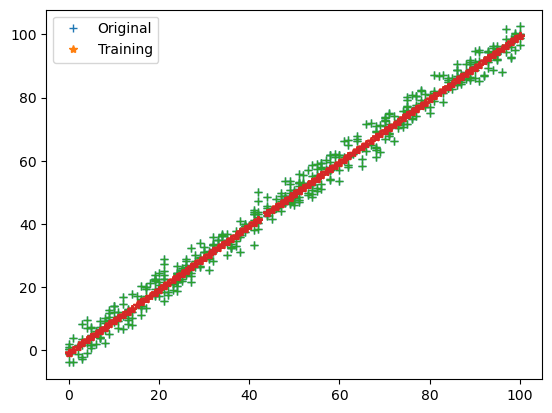

iteration = 16, loss = 3.986365275541597


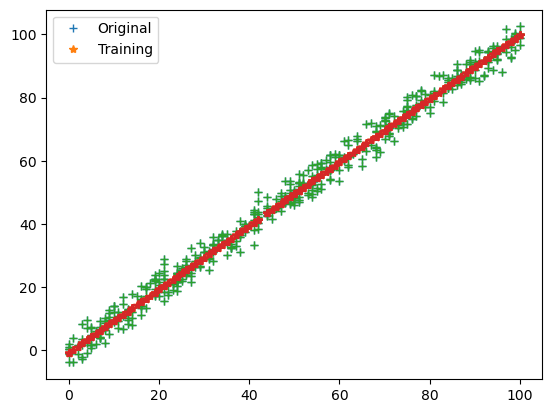

iteration = 17, loss = 3.9661597209928123


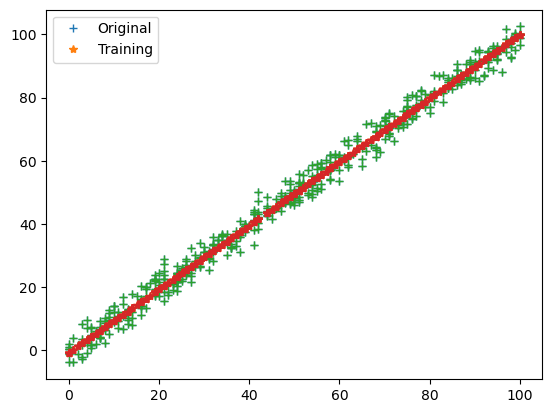

iteration = 18, loss = 3.9569913647621586


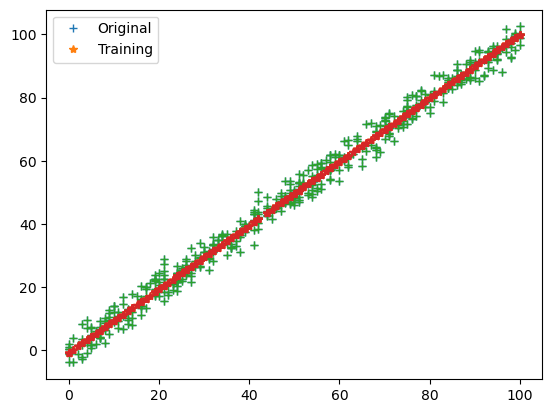

iteration = 19, loss = 3.952830597687786


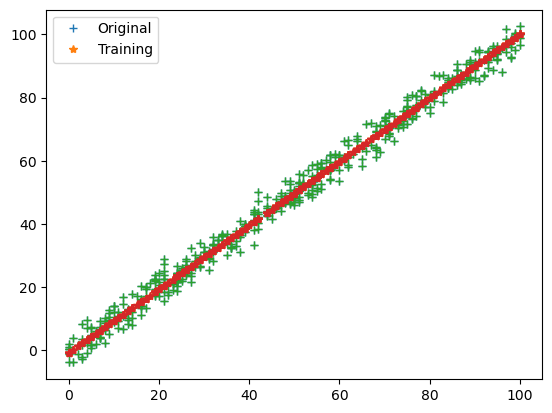

iteration = 20, loss = 3.9509417794143142


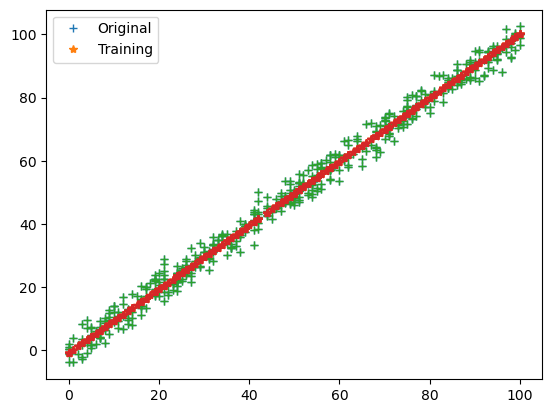

In [80]:
parameters, loss = train(train_input,train_output,0.0001,20)

In [81]:
print(parameters)

{'m': 1.0087657556580802, 'c': -0.7925623024865225}


In [82]:
loss

[5209.3074805036,
 2365.6261314409253,
 1075.4447525179653,
 490.0880307680404,
 224.51103667041485,
 104.01845920989723,
 49.35084227916905,
 24.548082851299675,
 13.295042352078513,
 8.189524339066246,
 5.873144087350351,
 4.822198727352663,
 4.34538257942947,
 4.129049491007752,
 4.030897855257728,
 3.986365275541597,
 3.9661597209928123,
 3.9569913647621586,
 3.952830597687786,
 3.9509417794143142]

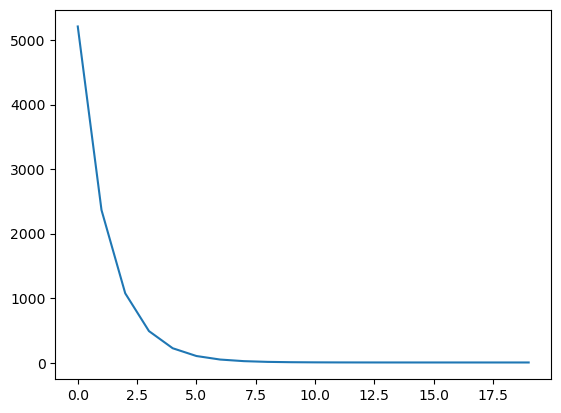

In [83]:
plt.plot(loss)


* High learning rate make the gradient descent too fast so model is not reaching to the optimal value
parameters, loss = train(train_input,train_output,0.001,20)

### Let's Predict

In [84]:
# y = mx + c
test_predictions = test_input * parameters["m"] + parameters["c"]

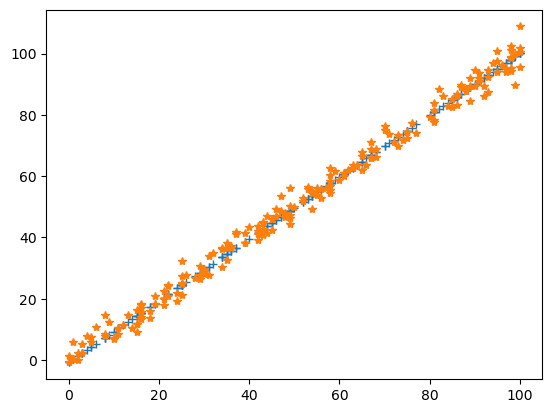

In [85]:
# Test_input vs Predicted_output
plt.plot(test_input,test_predictions,"+")
# Test_input vs Actual_output
plt.plot(test_input,test_output,"*")
plt.show()

### Cost of Prediction

In [86]:
# Gives the error range of our prediction
cost_function(test_output,test_predictions)

4.127253653796892